## Bitcoin Prediction
#### Model to predict the price of Bitcoin (BTC)
#### Machine Learning Algorithm: **XGBoost**, **LSTM**, **SVM**

## Import Libraries

In [72]:
import pandas as pd
import seaborn as sns

import json
import calendar

import joblib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

## Visualise Dataset

In [73]:
data_df = pd.read_csv("/Users/verona/Documents/Verona Personal/Github/machine-learning-portfolio/price-prediction/BTC-USD.csv")
data_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [74]:
def data_summary(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [75]:
data_summary(data_df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  2713

Number of features: 7

Data Features:
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

Missing values: 0

Unique values:
Date         2713
Open         2709
High         2710
Low          2712
Close        2710
Adj Close    2710
Volume       2713
dtype: int64


Plot BTC Closing Price over time

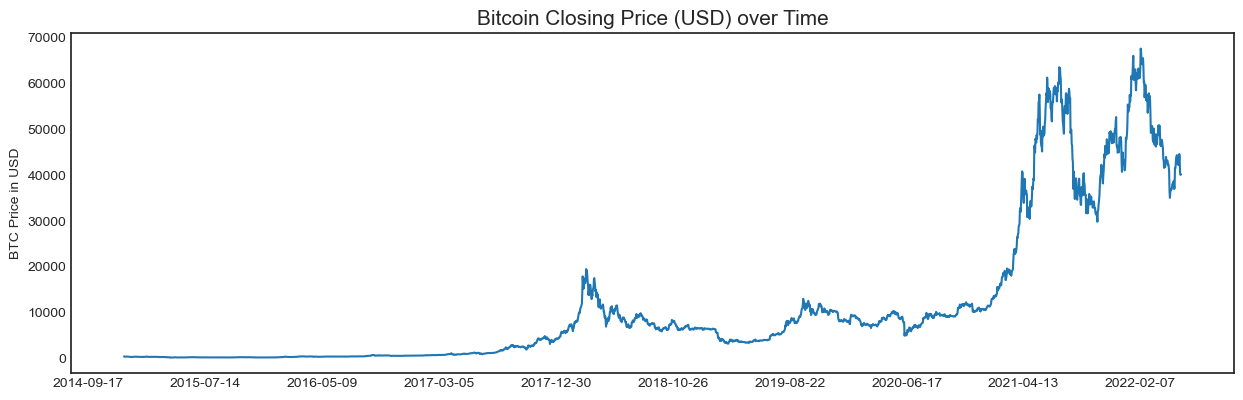

In [76]:
plt.style.use('seaborn-white')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)

plt.figure(figsize=(15, 5))

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.gcf().autofmt_xdate(rotation=0)

plt.plot(data_df['Date'], data_df['Close'])
plt.title('Bitcoin Closing Price (USD) over Time', fontsize=15)
plt.ylabel('BTC Price in USD')
plt.show()

Check for any duplicate columns and remove these

In [77]:
data_df.T.duplicated()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close     True
Volume       False
dtype: bool

In [78]:
duplicated_cols = data_df.columns[data_df.T.duplicated()]
data_df = data_df.drop(columns=duplicated_cols, axis=1)

In [79]:
data_df.head()

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


In [80]:
pd.DataFrame.drop?

Signature:
pd.DataFrame.drop(
    self,
    labels=None,
    axis: 'Axis' = 0,
    index=None,
    columns=None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'str' = 'raise',
)
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by specifying directly index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the `user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop. A tuple will be used as a single
    label and not treated as a list-like.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single label or list-like
    Alternative to specifying axis (``labels, axis=0``
    is equivalent to ``index=l

In [81]:
help(pd.DataFrame.drop)

Help on function drop in module pandas.core.frame:

drop(self, labels=None, axis: 'Axis' = 0, index=None, columns=None, level: 'Level | None' = None, inplace: 'bool' = False, errors: 'str' = 'raise')
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the `user guide <advanced.shown_levels>`
    for more information about the now unused levels.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop. A tuple will be used as a single
        label and not treated as a list-like.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index : single label or list-like
        Alternative to specifying a

In [88]:
data_df.iloc[:, 1:].columns.tolist()

['Open', 'High', 'Low', 'Close', 'Volume']

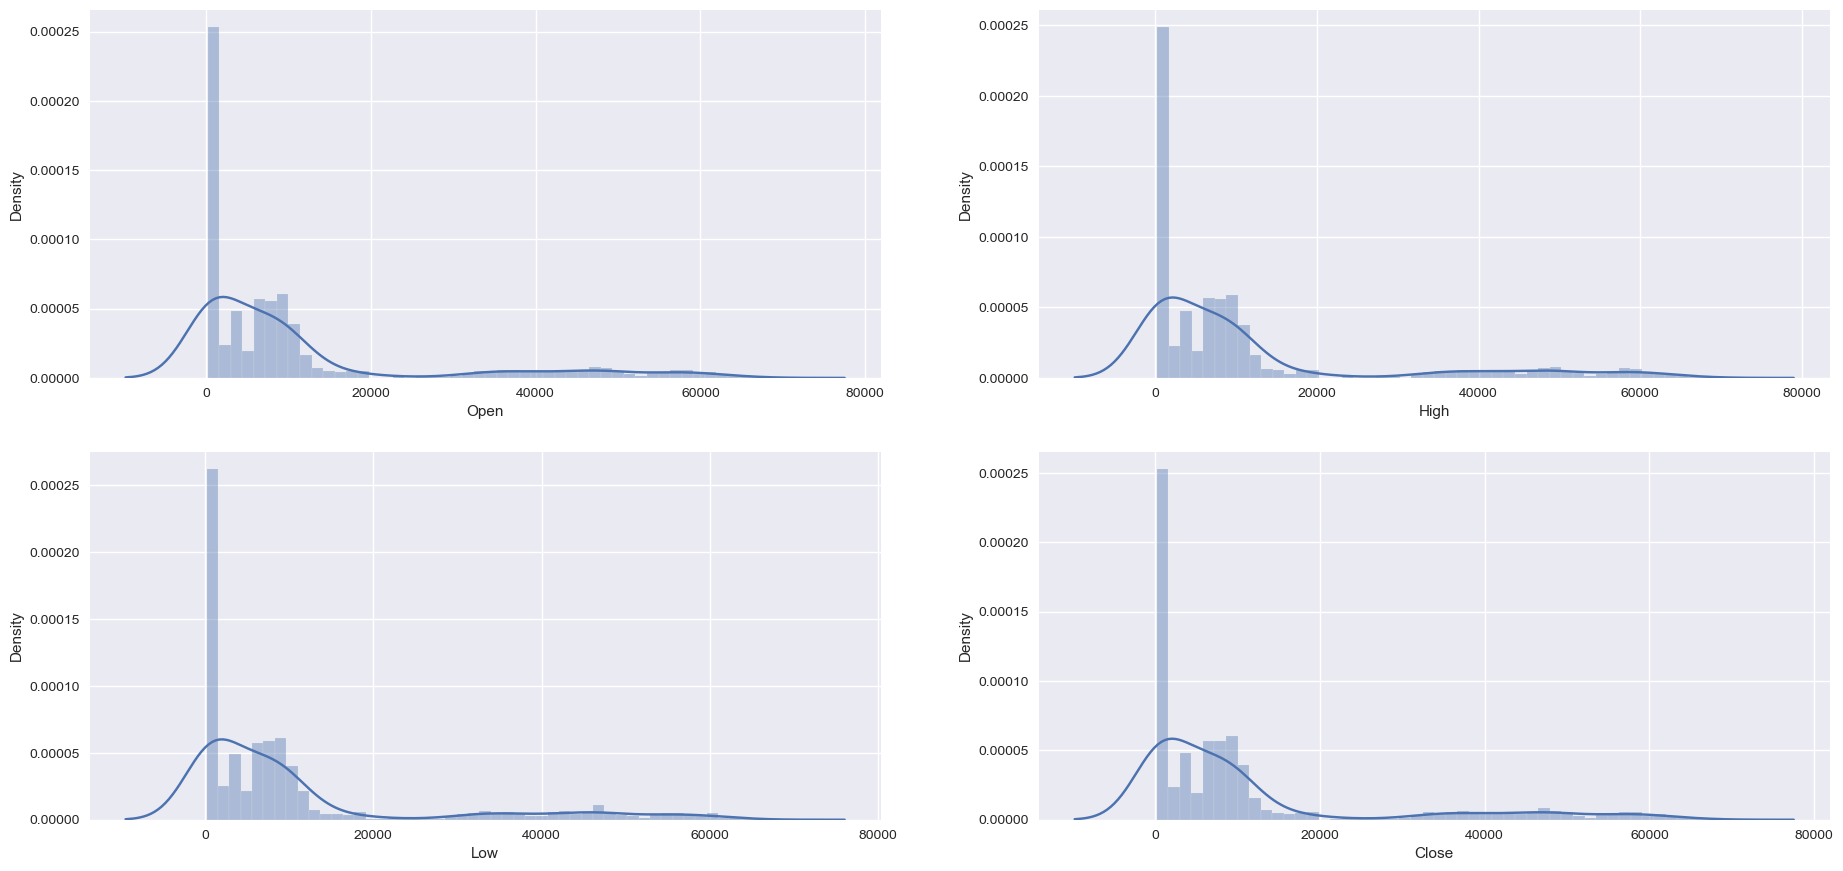

In [116]:
features = data_df.iloc[:, 1:-1].columns.tolist()
plt.style.use('seaborn')

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.distplot(data_df[col])
plt.show()

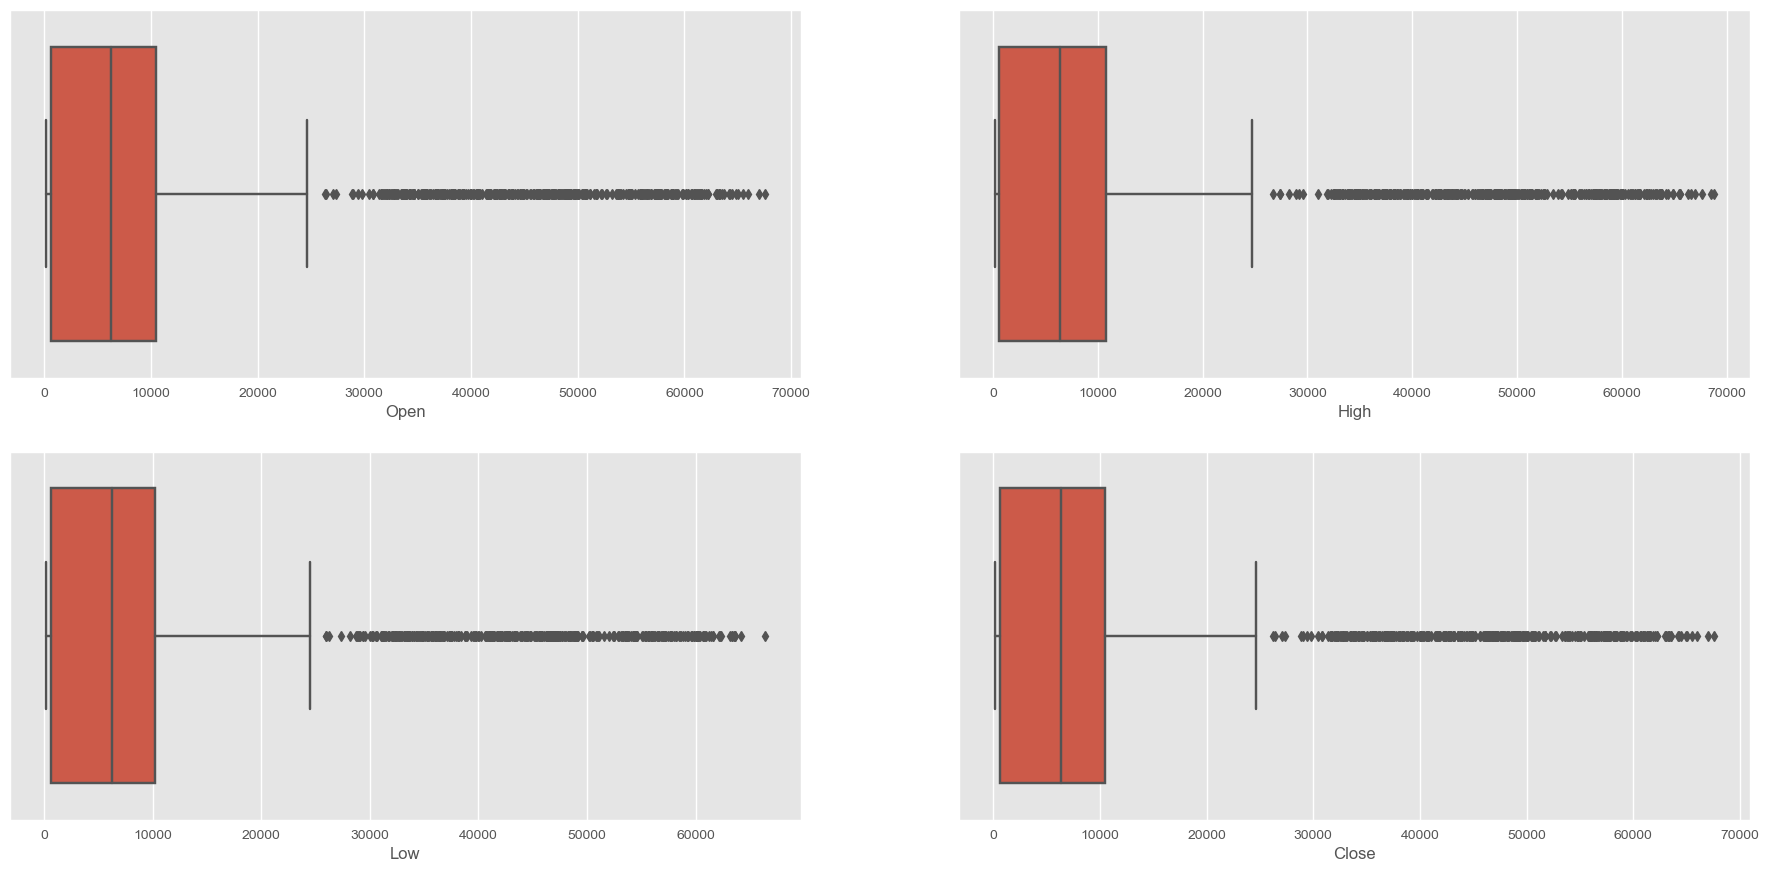

In [117]:
plt.subplots(figsize=(20,10))
plt.style.use('ggplot')
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(data_df[col])
plt.show()